In [10]:
import pandas as pd
import os
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.5, style="whitegrid", rc={
    'figure.figsize':(8,4),
    "lines.linewidth": 3,
    "lines.markersize":20,
    "ps.useafm": True,
    "font.sans-serif": ["Helvetica"],
    "pdf.use14corefonts" : True,
    "text.usetex": True,
    })

DATA_DIR = "/data/test_mimic_output/"
BASE_DIR = "/home/joe/value-of-medical-notes/"

In [11]:
columns =  ['900001','900002','900003','900004','900005','900006','900007','900008','900010','900011','900012','900013','900014','900015', '900016']
note2id = {'Nursing/other': 900001, 'Physician': 900002, 'Nutrition': 900003, 'General': 900004, 'Nursing': 900005, 'Respiratory ': 900006,'Rehab Services': 900007, 'Social Work': 900008, 'Echo': 900010,'ECG': 900011,'Case Management ': 900012,'Pharmacy': 900013,'Consult': 900014, 'Radiology': 900015, 'Discharge summary': 900016}


In [ ]:
period = "retro"
columns =  ['900001','900002','900003','900004','900005','900006','900007','900008','900010','900011','900012','900013','900014','900015', '900016']


is_notes = []
notes_count = np.zeros((len(columns),))
notes_word_count = np.zeros((len(columns),))
notes_word_len = {col:[] for col in columns}
notes_len_full = []
token_in_admissions = []
stays = []
feature_path = f'{DATA_DIR}/timeseries_features_retro/note_mask/'
note_path =  f'{DATA_DIR}/timeseries_features_retro/note/'
for i, stay in enumerate(os.listdir(feature_path)):
    if i%5000 == 0:
        print(f"processed {i} admission")
    tmp_word_len = {col:[] for col in columns}
    note_mask = np.load(os.path.join(feature_path, stay), allow_pickle=True).astype(float)
    notes_num = note_mask.sum(axis=0)
    notes_count += notes_num
    notes = pd.read_csv(os.path.join(note_path, stay[:-4]+'.csv')).fillna("")
    stays.append(stay[:-4]+'.csv')
    token_in_admission = 0
    for i, col in enumerate(columns):
        is_notes = note_mask[:,i]
        for n, is_note in zip(notes[col], is_notes):
            if is_note:
                n_len = len(word_tokenize(str(n)))
                notes_word_count[i] += n_len
                token_in_admission += n_len
                notes_word_len[col].append(n_len)
                tmp_word_len[col].append(n_len)
    notes_len_full.append(tmp_word_len)
    token_in_admissions.append(token_in_admission)

#     stays.append(stay[:-4]+'.csv')
#     is_notes.append(note_mask)
# df = pd.DataFrame(data=is_notes, columns=columns)
# df.insert(0, 'stay', stays)
# df.to_csv(f'/data/joe/physician_notes/mimic-data/preprocessed/patient2notes_{period}.csv', index=False)


processed 0 admission


## Average note length

In [8]:
avg_len = notes_word_count/notes_count
for l, n in zip(avg_len, note2id.keys()):
    print(f"{n:<20}, {l:.0f}")

Nursing/other       , 216
Physician           , 1373
Nutrition           , 603
General             , 291
Nursing             , 364
Respiratory         , 205
Rehab Services      , 624
Social Work         , 448
Echo                , 466
ECG                 , 43
Case Management     , 263
Pharmacy            , 513
Consult             , 1210
Radiology           , 451
Discharge summary   , 2211


## Percentage of notes appears in admission

In [9]:
patient2notes = pd.read_csv(f"{DATA_DIR}/patient2notes_retro.csv")
portion = np.sum(patient2notes[columns].values, axis=0)/len(patient2notes)
for l, n in zip(portion, note2id.keys()):
    print(f"{n:<20}, {100*l:<6.1f}")

Nursing/other       , 54.8  
Physician           , 18.2  
Nutrition           , 6.4   
General             , 6.4   
Nursing             , 18.4  
Respiratory         , 8.1   
Rehab Services      , 4.6   
Social Work         , 2.8   
Echo                , 45.8  
ECG                 , 61.3  
Case Management     , 1.3   
Pharmacy            , 0.1   
Consult             , 0.1   
Radiology           , 83.3  
Discharge summary   , 96.7  


## Counts of notes

In [10]:
for l, n, p, al in sorted(zip(notes_count, note2id.keys(), portion, avg_len), key=lambda x: x[0], reverse=True):
    print(f"{n:<20}, {l:<6.0f}, {100*p:<.1f}, {al:.0f}")

Nursing/other       , 417825, 54.8, 216
Radiology           , 338834, 83.3, 451
ECG                 , 123042, 61.3, 43
Physician           , 92426 , 18.2, 1373
Nursing             , 88703 , 18.4, 364
Discharge summary   , 47572 , 96.7, 2211
Echo                , 34064 , 45.8, 466
Respiratory         , 32798 , 8.1, 205
Nutrition           , 7971  , 6.4, 603
General             , 7710  , 6.4, 291
Rehab Services      , 5321  , 4.6, 624
Social Work         , 2294  , 2.8, 448
Case Management     , 939   , 1.3, 263
Pharmacy            , 97    , 0.1, 513
Consult             , 78    , 0.1, 1210


## Number of admission in our dataset

In [11]:
len(os.listdir(f'{DATA_DIR}/timeseries_features_retro/note/'))

49179

## Count of notes in all dataset
According to [offical documentation](https://mimic.physionet.org/mimictables/noteevents/), there should be 2,000,000 note events. But we only have 1.200,000 note events after cleaning data.

In [12]:
sum(notes_count)

1199674.0

## Length distribution of each note

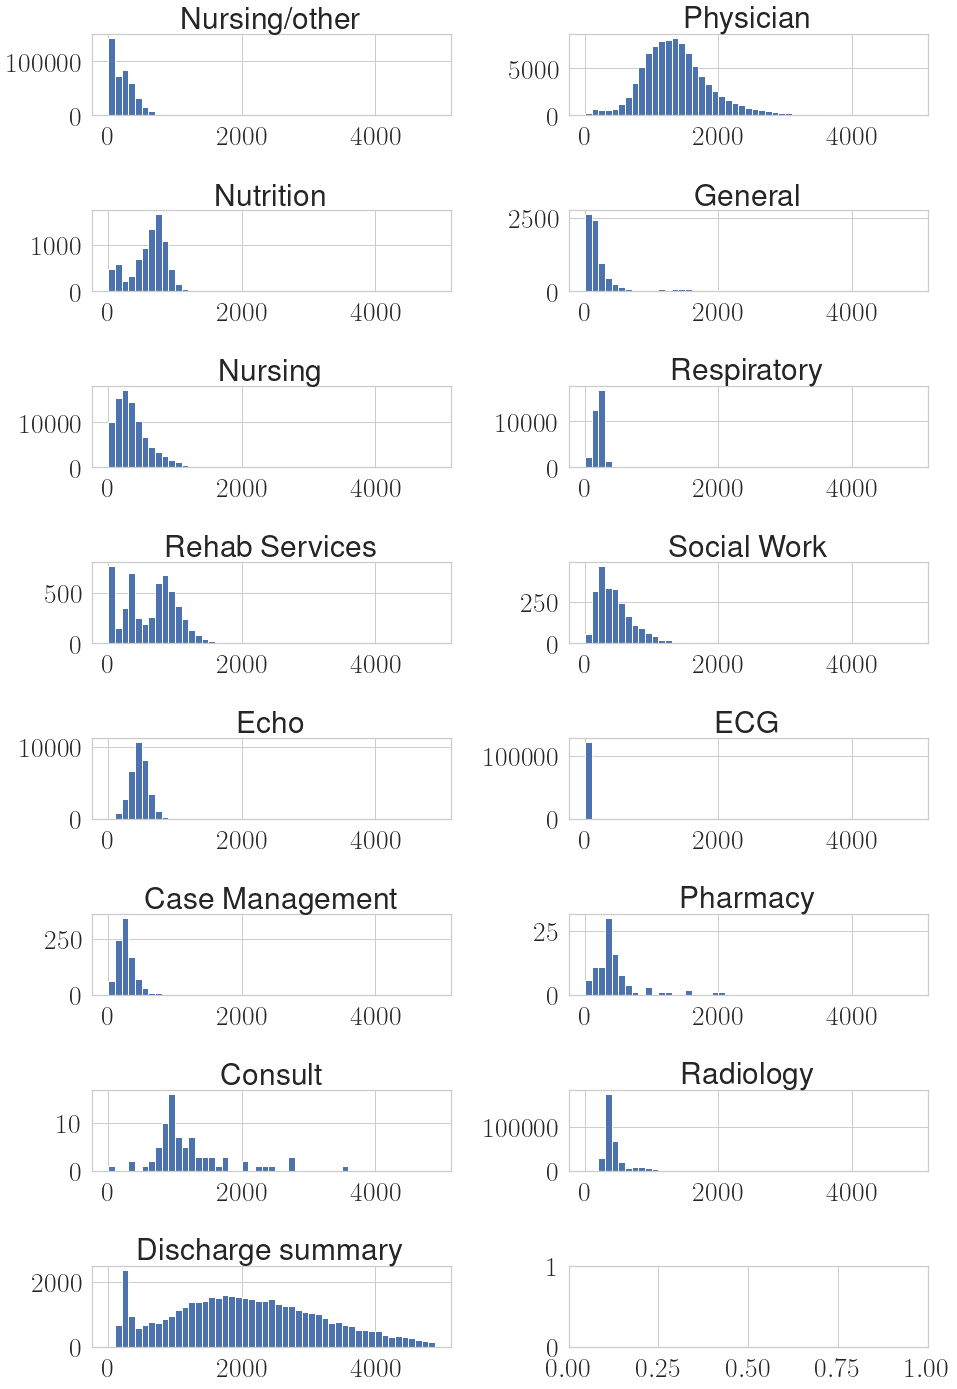

In [13]:
import matplotlib.pyplot as plt
k = list(note2id.keys())
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(8, 2, figsize=(14,20))
for i, n in enumerate(columns):
    ax[i//2, i%2].hist(notes_word_len[n], bins=list(range(0, 5000, 100)))
    ax[i//2, i%2].set_title(k[i])
f.tight_layout() 

## Distribution of number of each notes in an admission

In [14]:
notes_per_ad = []
feature_path = f'{DATA_DIR}/timeseries_features_retro/note_mask/'
note_path =  f'{DATA_DIR}/timeseries_features_retro/note/'
for i, stay in enumerate(os.listdir(feature_path)):
    if i%5000 == 0:
        print(f"processed {i} admission")
    note_mask = np.load(os.path.join(feature_path, stay), allow_pickle=True).astype(float)
    notes_num = note_mask.sum(axis=0)
    notes_per_ad.append(notes_num)

processed 0 admission
processed 5000 admission
processed 10000 admission
processed 15000 admission
processed 20000 admission
processed 25000 admission
processed 30000 admission
processed 35000 admission
processed 40000 admission
processed 45000 admission


In [15]:
notes_per_ad = np.stack(notes_per_ad)

### Without admissons that do not have that type of note

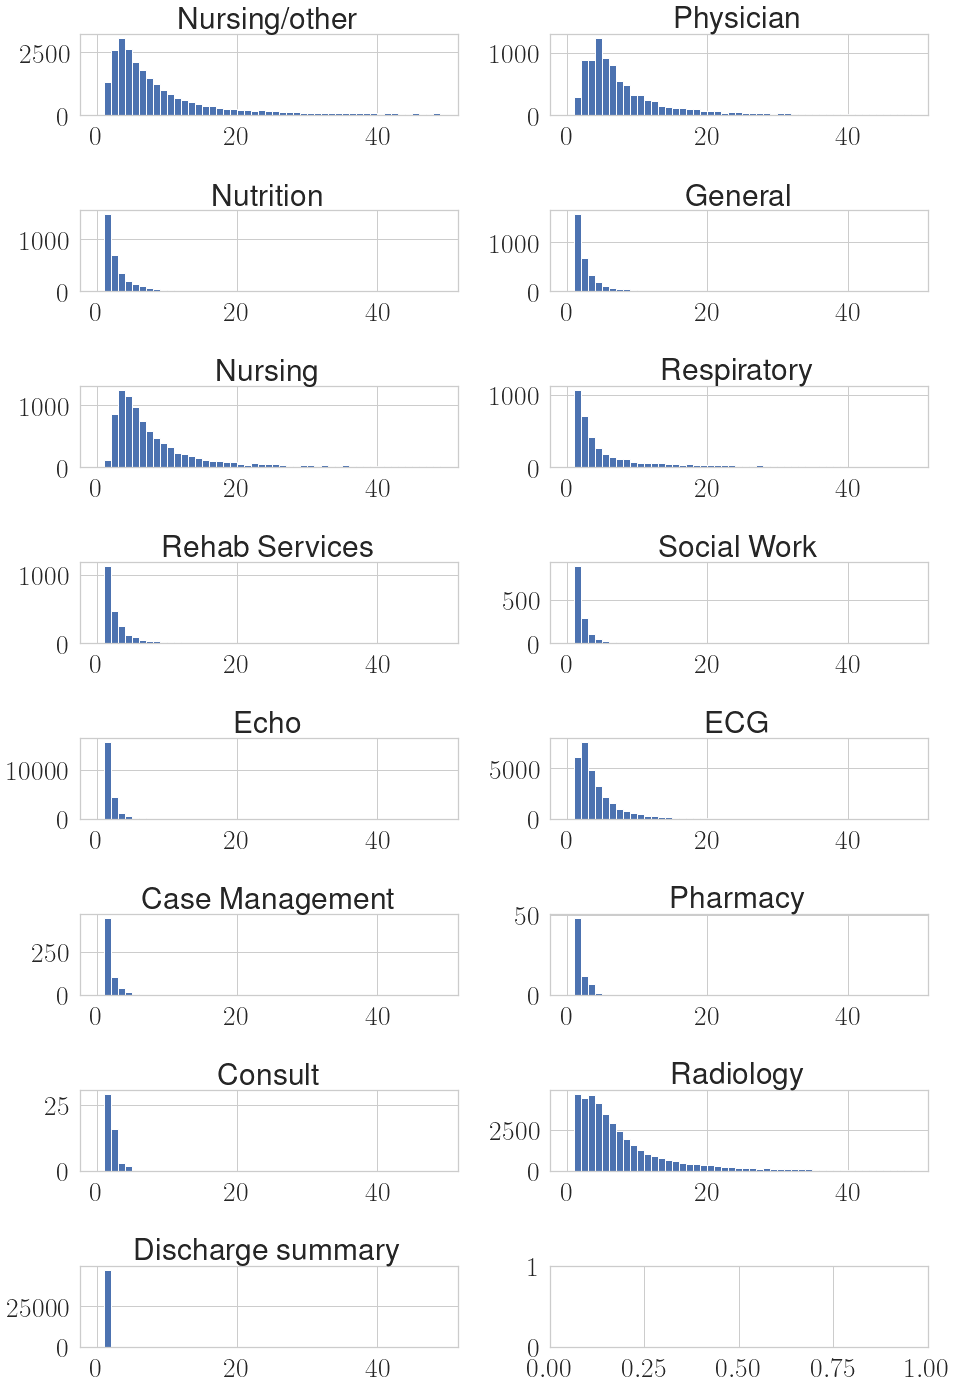

In [16]:
import matplotlib.pyplot as plt
k = list(note2id.keys())
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(8, 2, figsize=(14,20))
for i, n in enumerate(columns):
    ax[i//2, i%2].hist([a for a in notes_per_ad[:,i] if a != 0], bins=list(range(0, 50, 1)))
    ax[i//2, i%2].set_title(k[i])
f.tight_layout() 

### With admissons that do not have that type of note

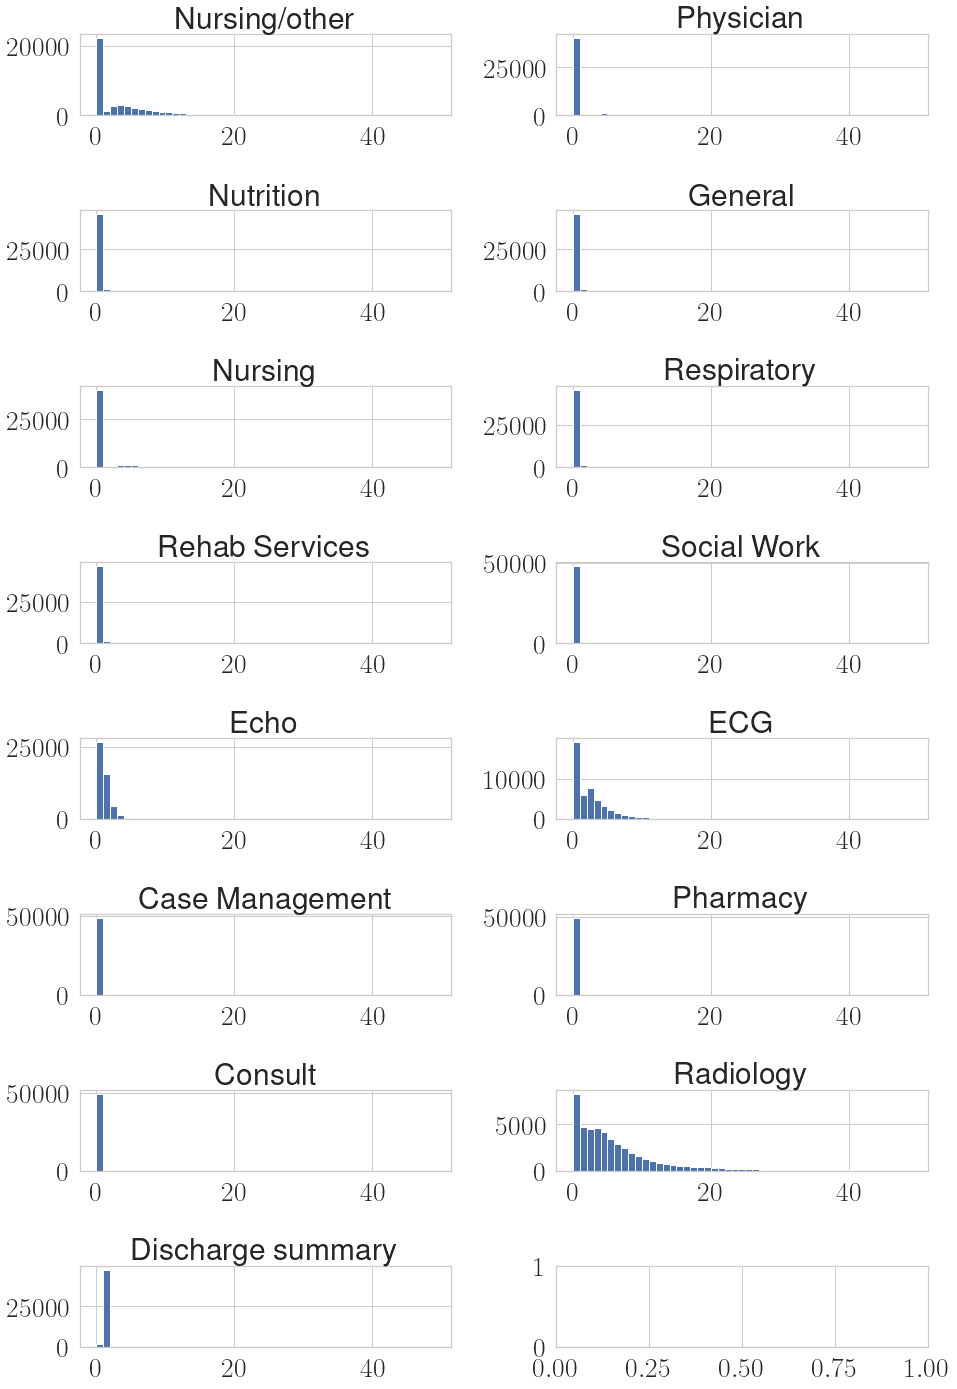

In [17]:
import matplotlib.pyplot as plt
k = list(note2id.keys())
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(8, 2, figsize=(14,20))
for i, n in enumerate(columns):
    ax[i//2, i%2].hist(notes_per_ad[:,i], bins=list(range(0, 50, 1)))
    ax[i//2, i%2].set_title(k[i])
f.tight_layout() 

## Overlap between Nrusing/other+Nursing notes and Physician notes

In [18]:
patient2notes = pd.read_csv(f"{DATA_DIR}/patient2notes_24.csv")
test_list = pd.read_csv(f'{DATA_DIR}/mortality/all_but_discharge_note_test_24.csv')
print(len(test_list))
patient2notes = patient2notes[patient2notes['stay'].isin(test_list['stay'])]
print(patient2notes[['900001', '900005', '900002']])
nursing_other = patient2notes['900001'].values
nursing = patient2notes['900005'].values
physician = patient2notes['900002'].values

n = nursing_other + nursing - (nursing_other * nursing)
print(sum(nursing_other * nursing))

6363
       900001  900005  900002
7         1.0     0.0     0.0
10        1.0     0.0     0.0
15        0.0     0.0     0.0
20        1.0     0.0     0.0
29        1.0     0.0     0.0
...       ...     ...     ...
48743     0.0     1.0     1.0
48748     0.0     0.0     0.0
48750     1.0     0.0     0.0
48765     0.0     0.0     0.0
48766     0.0     0.0     0.0

[6363 rows x 3 columns]
1.0


In [19]:
print("Number of physician ntoes", sum(physician))
print("Number of nursing ntoes", sum(nursing_other)+sum(nursing))
print("Number of overlap", sum((physician*n)>0))

Number of physician ntoes 562.0
Number of nursing ntoes 2205.0
Number of overlap 399


## Average len of Nursing and Nursing / other

In [20]:
nursing_len = notes_word_len['900001']+notes_word_len['900005']
print("avg len of nursing notes", sum(nursing_len)/len(nursing_len))

avg len of nursing notes 241.94403665740097


In [21]:
patient2notes = pd.read_csv(f"{DATA_DIR}/patient2notes_retro.csv")
nursing_other = patient2notes['900001'].values
nursing = patient2notes['900005'].values

n = nursing_other + nursing - (nursing_other * nursing)
print("portion", sum(n)/len(n))
print("Count", sum(n))

portion 0.7303930539457899
Count 35920.0


## Average token length of admissions

In [22]:
admission_len = []
for d in notes_len_full:
    tmp = 0
    for c in columns:
        tmp += sum(d[c])
    admission_len.append(tmp)

In [23]:
sum(admission_len)/len(admission_len)

11122.588869232803

/data/anaconda3/envs/notes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/anaconda3/envs/notes/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


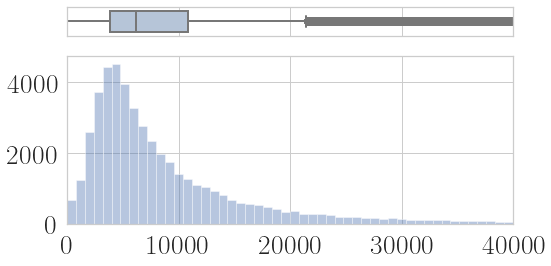

In [26]:
x = [i for i in token_in_admissions if i < 40000]
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(x, ax=ax_box, color='lightsteelblue',linewidth=2, width=.7)
sns.distplot(x, ax=ax_hist,kde = False)

# ax = sns.boxplot(x, linewidth=2, width=.5, color="skyblue")
# ax = sns.distplot(x,kde = False, ax=ax)

plt.xlim(0,40000)
if not os.path.exists("figure/data"):
    os.mkdir("figure/data")
plt.savefig('figure/data/token_per_admission.pdf')

/data/anaconda3/envs/notes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


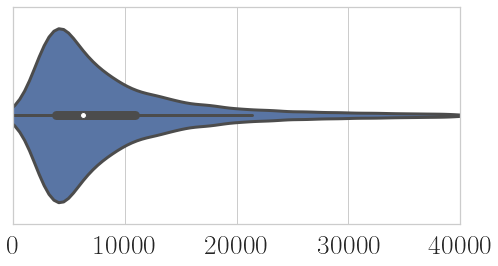

In [27]:
x = [i for i in token_in_admissions if i < 40000]
ax = sns.violinplot(x,kde = False)
plt.xlim(0,40000)
plt.savefig('figure/data/token_per_admission.pdf')

In [28]:
np.quantile(x, 0.25)

3849.5

In [29]:
feature_path = f'{DATA_DIR}/test/'
len(os.listdir(feature_path))

5762

# Get note length

In [30]:
df = pd.DataFrame({"stay":stays,"token_length":token_in_admissions})
print(df)

                                stay  token_length
0      96950_episode4_timeseries.csv          6928
1      82669_episode1_timeseries.csv          5011
2      19597_episode2_timeseries.csv         13745
3      29145_episode1_timeseries.csv          2985
4      29797_episode1_timeseries.csv         20491
...                              ...           ...
49174  52898_episode1_timeseries.csv         34991
49175   4678_episode1_timeseries.csv          5335
49176   1500_episode1_timeseries.csv          5656
49177  20133_episode6_timeseries.csv          4739
49178  42956_episode1_timeseries.csv         14234

[49179 rows x 2 columns]


In [31]:
df.to_csv(f'{DATA_DIR}/stay2token_all.csv')

## All but discharge

In [32]:
tokens = []
for n in notes_len_full:
    tmp = 0
    # except discharge notes
    for col in ['900001','900002','900003','900004','900005','900006','900007','900008','900010','900011','900012','900013','900014','900015']:
        tmp += sum(n[col])
    tokens.append(tmp)
df = pd.DataFrame({"stay":stays,"token_length":tokens})
df.to_csv(f'{DATA_DIR}/stay2token_all_but_discharge.csv')

# discharge

In [33]:
tokens = []
for n in notes_len_full:
    tmp = 0
    # except discharge notes
    for col in ['900016']:
        if n[col]:
            tmp = n[col][-1]
    tokens.append(tmp)
df = pd.DataFrame({"stay":stays,"token_length":tokens})
df.to_csv(f'{DATA_DIR}/stay2token_discharge.csv')
print(df)

                                stay  token_length
0      96950_episode4_timeseries.csv           187
1      82669_episode1_timeseries.csv          1181
2      19597_episode2_timeseries.csv          4405
3      29145_episode1_timeseries.csv          1294
4      29797_episode1_timeseries.csv          5956
...                              ...           ...
49174  52898_episode1_timeseries.csv          5133
49175   4678_episode1_timeseries.csv          2541
49176   1500_episode1_timeseries.csv           177
49177  20133_episode6_timeseries.csv          1670
49178  42956_episode1_timeseries.csv           248

[49179 rows x 2 columns]


## last physician

In [39]:
tokens = []
count_one = 0
for n in notes_len_full:
    tmp = 0
    # except discharge notes
    for col in ['900002']:
        if n[col]:
            tmp = n[col][-1]
        if len(n[col]) == 1:
            count_one += 1
    tokens.append(tmp)
print(count_one)
df = pd.DataFrame({"stay":stays,"token_length":tokens})
df = df[df.token_length>0]
df.to_csv(f'{DATA_DIR}/stay2token_last_physician.csv')
print(df)

288
                                stay  token_length
15     23092_episode2_timeseries.csv          1667
22     81268_episode1_timeseries.csv          1251
31     72033_episode1_timeseries.csv           884
34     71169_episode1_timeseries.csv           741
37     90688_episode2_timeseries.csv          1471
...                              ...           ...
49154  30322_episode2_timeseries.csv          1415
49163  89310_episode1_timeseries.csv          1526
49166  91648_episode1_timeseries.csv          2739
49167  44265_episode1_timeseries.csv           828
49178  42956_episode1_timeseries.csv           861

[8964 rows x 2 columns]


## Last nursing

In [35]:
tokens = []
for n in notes_len_full:
    tmp = 0
    # except discharge notes
    count = 0
    for col in ['900001', '900005']:
        if n[col] and count== 0:
            tmp = n[col][-1]
            count +=1
    tokens.append(tmp)
df = pd.DataFrame({"stay":stays,"token_length":tokens})
df.to_csv('/data/joe/physician_notes/mimic-data/stay2token_last_nursing.csv')
print(df)

                                stay  token_length
0      96950_episode4_timeseries.csv             0
1      82669_episode1_timeseries.csv             0
2      19597_episode2_timeseries.csv           238
3      29145_episode1_timeseries.csv           123
4      29797_episode1_timeseries.csv           497
...                              ...           ...
49174  52898_episode1_timeseries.csv             0
49175   4678_episode1_timeseries.csv           185
49176   1500_episode1_timeseries.csv            74
49177  20133_episode6_timeseries.csv             0
49178  42956_episode1_timeseries.csv           240

[49179 rows x 2 columns]


In [3]:
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
def precision_at_k(y_label, y_pred, k):
    # precision @ K percent
    rank = list(zip(y_label, y_pred))
    rank.sort(key=lambda x: x[1], reverse=True)
    num_k = len(y_label)*k//100
    num_k = 1 if num_k < 1 else num_k
    return sum(rank[i][0] == 1 for i in range(num_k))/float(num_k)

def get_quartile(df):
    x = df['token_length'].values
    q1 = np.quantile(x, 0.25)
    q2 = np.quantile(x, 0.50)
    q3 = np.quantile(x, 0.75)
    return [(0,q1),(q1,q2),(q2,q3),(q3,float('inf'))]

def get_df_len(task, heu, res):
    if "sim" in heu:
        if task == "readmission":
            return pd.read_csv(f'{DATA_DIR}/stay2token_discharge.csv')
        elif task == "mortality":
            if "physician" in res:
                return pd.read_csv(f'{DATA_DIR}/stay2token_last_physician.csv')
            elif "nursing" in res:
                return pd.read_csv(f'{DATA_DIR}/stay2token_last_nursing.csv')
            else:
                return pd.read_csv(f'{DATA_DIR}/stay2token_last_physician.csv')
    else:
        if task == "readmission":
            return pd.read_csv(f'{DATA_DIR}/stay2token_all.csv')
        elif task == "mortality":
            return pd.read_csv(f'{DATA_DIR}/stay2token_all_but_discharge.csv')

def get_group_result(df):
    if len(df) == 0:
        df = pd.DataFrame(data=[["test",0,0,0,0,0,0]], columns=["TYPE","ROCAUC","PRAUC","P@1","P@5","P@10","NUM_ADMIT"])
        return df
    label, pred = df['y_label'], df['prob']
    p_at_1 = precision_at_k(label, pred,1)
    p_at_5 = precision_at_k(label, pred,5)
    p_at_10 = precision_at_k(label, pred,10)
    pr = average_precision_score(label, pred)
    try:
        roc = roc_auc_score(label, pred)
    except ValueError:
        roc = -1
    df = pd.DataFrame(data=[["test",roc,pr,p_at_1,p_at_5,p_at_10,len(df)]], columns=["TYPE","ROCAUC","PRAUC","P@1","P@5","P@10","NUM_ADMIT"])
    return df

In [8]:
# df_len = pd.read_csv('/data/joe/physician_notes/mimic-data/stay2token_len.csv')
for model in [ 'LR','DAN']: #'LR',
    for task in ['mortality', 'readmission']:
        for i, heu in enumerate(os.listdir(f'{DATA_DIR}/select_sentence/{model}/{task}')):
            if (i+1)%10 == 0:print(i,"task")
            if "csv" in heu: continue
            if "@" in heu:continue
            if "train"  in heu: continue
            if "valid"  in heu: continue
#             if "new" not in heu: continue
            for res in os.listdir(f'{DATA_DIR}/select_sentence/{model}/{task}/{heu}/'):
#                 if os.path.exists(f'/data/joe/physician_notes/select_sentence/{model}/group/q0/{task}/{heu}/{res}'):
#                         continue
                print(f'{DATA_DIR}/select_sentence/{model}/{task}/{heu}/{res}')
                df_len = get_df_len(task, heu, res) 
                df = pd.read_csv(f'{DATA_DIR}/select_sentence/{model}/{task}/{heu}/{res}', lineterminator='\n')
                df = pd.merge(df, df_len, on="stay")
                quartile_set = get_quartile(df)
                for q, (g_low, g_high) in enumerate(quartile_set):
                    import pathlib
                    path = f'{DATA_DIR}/select_sentence/{model}/group/q{q}/{task}/{heu}/'
                    pathlib.Path(path).mkdir(parents=True, exist_ok=True)

                    result = get_group_result(df[(df['token_length']>=g_low) & (df['token_length']<g_high)])
                    result.to_csv( f'{DATA_DIR}/select_sentence/{model}/group/q{q}/{task}/{heu}/{res}')


/data/test_mimic_output//select_sentence/LR/mortality/similarity_near_max_new_test_token_percent_25/physician_text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/similarity_far_max_new_test_token_percent_45/physician_text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/fracmedicalsent_norm_test_token_percent_35/physician_text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/similarity_near_max_new_test_token_percent_40/physician_text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/longest_test_token_percent_20/physician_text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/all/text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/all/physician_text_all_but_discharge_24.csv
/data/test_mimic_output//select_sentence/LR/mortality/similarity_near_max_new_test_token_percent_45/physician_text_all_but_discharge_2

FileNotFoundError: [Errno 2] No such file or directory: '/data/test_mimic_output//select_sentence/DAN/mortality'

In [9]:

notes = ['all'] #', 'discharge', 'last_physician', 'last_nursing'
test_notes = ['test_token_percent_1/', 'test_token_percent_1/'] #, 'sim_token_100/', 'sim_token_100/physician_', 'sim_token_100/nursing_'
for model in [ 'LR','DAN']: #'LR',
    for task in ['readmission']:#'mortality', 
        for i, res in enumerate(os.listdir(f'{DATA_DIR}/select_sentence/{model}/{task}/all')): 
            print(f'{DATA_DIR}/select_sentence/{model}/{task}/all/{res}')
            period = res.split(".")[0].split("_")[-1]
            for n, t_n in zip(notes, test_notes):
                try:
                    test_list = pd.read_csv(f'{DATA_DIR}/select_sentence/{model}/{task}/longest_{t_n}{res}')
                    df_len = pd.read_csv(f'{DATA_DIR}/stay2token_{n}.csv')
                    df_len = df_len[df_len['token_length']>0]
                    df = pd.read_csv(f'{DATA_DIR}/select_sentence/{model}/{task}/all/{res}', lineterminator='\n')
                    df = df[df['stay'].isin(test_list['stay'])]
                    df = pd.merge(df, df_len, on="stay")
                    print(n,len(df))
                    quartile_set = get_quartile(df)
                    print(quartile_set)
                    if n in ['last_physician', 'discharge']:
                        print(n, quartile_set)
                    for q, (g_low, g_high) in enumerate(quartile_set):
                        import pathlib
                        path = f'{DATA_DIR}/select_sentence/{model}/group/q{q}/{task}/all/'
                        pathlib.Path(path).mkdir(parents=True, exist_ok=True)
                        result = get_group_result(df[(df['token_length']>=g_low) & (df['token_length']<g_high)])
                        idx = t_n.index("/")
                        print("t n:", t_n)
                        result.to_csv( f'{DATA_DIR}/select_sentence/{model}/group/q{q}/{task}/all/{t_n[idx:]}{res}')
                        print(f'{DATA_DIR}/select_sentence/{model}/group/q{q}/{task}/all/{t_n[idx:]}{res}')
                except:
                    print("error", n)


/data/test_mimic_output//select_sentence/LR/readmission/all/text_all_retro.csv
error all
/data/test_mimic_output//select_sentence/LR/readmission/all/discharge_text_all_retro.csv
all 6878
[(0, 4213.25), (4213.25, 6826.5), (6826.5, 12164.75), (12164.75, inf)]
t n: test_token_percent_1/
/data/test_mimic_output//select_sentence/LR/group/q0/readmission/all//discharge_text_all_retro.csv
t n: test_token_percent_1/
/data/test_mimic_output//select_sentence/LR/group/q1/readmission/all//discharge_text_all_retro.csv
t n: test_token_percent_1/
/data/test_mimic_output//select_sentence/LR/group/q2/readmission/all//discharge_text_all_retro.csv
t n: test_token_percent_1/
/data/test_mimic_output//select_sentence/LR/group/q3/readmission/all//discharge_text_all_retro.csv


FileNotFoundError: [Errno 2] No such file or directory: '/data/test_mimic_output//select_sentence/DAN/readmission/all'

In [166]:
df2 = pd.read_csv('/data/joe/physician_notes/select_sentence/LR//all_sim/physician_text_all_but_discharge_retro.csv')
df2

,Unnamed: 0,stay,y_label,prob,bestSents,note_id
0,0,11285_episode2_timeseries.csv,0,0.629289,Chief Complaint : Fall \n HPI : \n 85 ...,900002
1,1,11638_episode4_timeseries.csv,0,0.558283,Chief Complaint : increasing dyspnea / transfe...,900002
2,2,11638_episode5_timeseries.csv,0,0.586667,Chief Complaint : \n HPI : \n 71 yo F w/...,900002
3,3,11638_episode6_timeseries.csv,0,0.694781,Chief Complaint : Fluid overload \n HPI :...,900002
4,4,11818_episode4_timeseries.csv,0,0.134014,Chief Complaint : Hypotension \n I saw an...,900002
...,...,...,...,...,...,...
557,557,99354_episode1_timeseries.csv,0,0.064850,Chief Complaint : dark stool \n HPI : \n ...,900002
558,558,99440_episode1_timeseries.csv,0,0.266392,SICU \n HPI : \n 20 M prisoner found dow...,900002
559,559,99810_episode1_timeseries.csv,0,0.038659,Chief Complaint : Post op prostatectomy with...,900002
560,560,99864_episode1_timeseries.csv,0,0.071856,Chief Complaint : coffee ground emesis \n ...,900002


[(0, 9429.5), (9429.5, 13054.5), (13054.5, 17537.75), (17537.75, inf)]
438


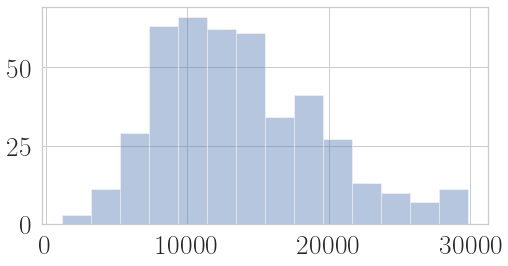

In [153]:
print(get_quartile(df2[(df2['token_length']<30000)]))
a = df2[(df2['token_length']<30000)]
print(len(a))
sns.distplot(a['token_length'].values, kde = False)

In [54]:
import pandas as pd
df = pd.read_csv('/data/joe/physician_notes/mimic-data/stay2token_discharge.csv')
get_quartile(df[df["token_length"]>0])

[(0, 1265.0), (1265.0, 2055.0), (2055.0, 2946.0), (2946.0, inf)]

In [62]:
save_result(df2[df2['token_length']>=5000])

,TYPE,ROCAUC,PRAUC,P@1,P@5,P@10,NUM_ADMIT
0,test,0.724841,0.294774,0.619048,0.414286,0.354762,4207


# 25\% of discharge is ? \% is all

In [13]:
import pandas as pd 
df_all = pd.read_csv(f'{DATA_DIR}/stay2token_all.csv')
df_dis = pd.read_csv(f'{DATA_DIR}/stay2token_discharge.csv')
df_dis = df_dis[df_dis['token_length']>0]
df_all = df_all[df_all['stay'].isin(df_dis['stay'])]
all_percent = []
for i, row in df_dis.iterrows():
    len_25 = row['token_length']/4.
    print(len_25)
    all_len = df_all[df_all['stay'] == row['stay']]['token_length'].iloc[0]
    print(all_len)
    all_percent.append(len_25/all_len)

44.75
6888
292.75
4995
1097.75
13705
318.0
2959
1482.25
20428
75.75
1104
551.25
6044
410.25
7858
530.25
3172
354.75
36738
1298.5
8717
1324.5
14383
1988.0
62574
421.75
2754
59.25
1759
291.75
9542
264.75
8687
891.25
5944
681.0
2724
386.0
3590
81.25
2634
497.75
2422
392.25
20091
494.25
6158
75.25
2112
904.0
4338
567.75
6802
108.75
3516
620.0
4851
207.5
21495
699.25
38915
336.5
8697
504.75
9474
707.5
5228
538.75
5771
1058.75
15663
51.25
9229
152.25
6216
615.25
12567
471.0
11196
278.0
4534
576.25
38385
271.25
17190
321.75
3530
356.75
71857
535.75
6174
1134.75
21424
557.25
8891
173.75
6401
737.0
8831
184.75
3733
666.75
11618
522.75
3939
420.25
47957
515.75
5524
623.25
32476
279.75
3359
57.5
21216
704.75
10023
300.75
2786
659.25
4588
330.0
4710
1107.5
14452
2570.0
51921
486.25
4240
389.5
3356
744.75
4928
1537.0
7277
666.5
24502
379.25
65178
574.25
10352
241.0
1775
954.0
7106
179.0
3152
480.0
4607
61.25
8246
383.75
6436
536.75
3678
629.25
8453
419.0
5645
287.5
23536
1221.75
63321
577.0
3130
48

In [14]:
print(len(all_percent))
print(sum(all_percent)/len(all_percent))


47572
0.08495608999122788


In [9]:
print(all_percent[0])

Series([], Name: token_length, dtype: float64)


In [42]:
df = pd.read_csv(f'{DATA_DIR}/timeseries_features_retro/note/83471_episode1_timeseries.csv")

## Selected sentences of different value function

In [49]:
import pandas as pd
import numpy as np
value = ["similarity_far_max_new_test", "similarity_near_max_new_test", "similaritymix_0.5_max_new_test", "fracmedicalsent_sim_norm"]
name = ["dissimilar", "similar", "mix-similar", "fraction"]
file_path = f'{DATA_DIR}/select_sentence/LR/readmission/{}_token_percent_5/text_all_retro.csv'
dfs = [pd.read_csv(file_path.format(v),engine='python') for v in value]

In [50]:
mae = dfs[2]['y_label']-dfs[2]['prob']
indice = np.argsort(mae**2)

In [ ]:
for i in indice:
    if df.iloc[i]['y_label']!=1: continue
    print("="*10+str(i)+"="*10)
    for n, df in zip(name, dfs):
        print(n+ " "+ df.iloc[i]['prob'].astype(str) + f" Label:{df.iloc[i]['y_label'].astype(str)}" +" :")
        print(df.iloc[i]['bestSents'])
        print()

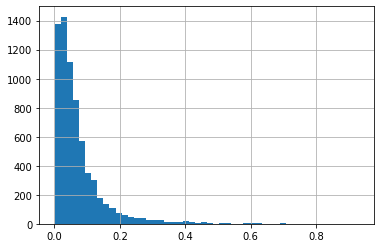

In [52]:
dfs[2]['prob'].hist(bins=50)